Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

Download the data from the following URL

https://drive.google.com/file/d/1yqoGqDRvv5xbfgkJKmp5nmquKYrdaLfl/view?usp=sharing

Read and assign it to a variable called chipo.

In [ ]:
uploaded = files.upload()
chipo = pd.read_csv('chipotle.tsv', sep='\t')
print(chipo)

Saving chipotle.tsv to chipotle (6).tsv
      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                

See the first 10 entries

In [ ]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

What is the number of observations in the dataset ?

Answer: 4622

In [ ]:
# Get the number of rows (observations) in the dataset
num_observations = chipo.shape[0]
num_observations

4622

What is the number of columns in the dataset ?

Answer: 5

In [ ]:
# Get the number of columns in the dataset
num_columns = chipo.shape[1]
num_columns

5

Print the name of all the columns.

In [ ]:
# Print the names of all the columns in the dataset
column_names = chipo.columns
column_names

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

How is the dataset indexed ?

Answer: RangeIndex(start=0, stop=4622, step=1)

In [ ]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Which was the most-ordered item ?

Answer: Chicken Bowl

In [ ]:
most_ordered_item = chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)
most_ordered_item_name = most_ordered_item.index[0]
print(most_ordered_item_name)

Chicken Bowl


For the most-ordered item, how many items were ordered ?

761

In [ ]:
most_ordered_item = chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)
most_ordered_item_quantity = most_ordered_item.iloc[0]['quantity']
most_ordered_item_quantity

761

What was the most ordered item in the choice_description column ?

Answer: [Diet Coke]

In [ ]:
most_ordered_choice = chipo.groupby('choice_description').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False)
most_ordered_choice_description = most_ordered_choice.index[0]
print(most_ordered_choice_description)

[Diet Coke]


How many items were orderd in total ?

Answer: 4972

In [ ]:
total_items_ordered = chipo['quantity'].sum()
total_items_ordered

4972

Turn the item price into a float

In [ ]:
chipo['item_price'] = chipo['item_price'].astype(str).str.replace('$', '').astype(float)
print(chipo['item_price'].head())

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64


How much was the revenue for the period in the dataset ?

Answer: Revenue was: $39237.02

In [ ]:
chipo['item_price'] = chipo['item_price'].astype(str).str.replace('$', '').astype(float)

chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print(f"Revenue was:${total_revenue:.2f}")

Revenue was:$39237.02


How many orders were made in the period ?

Answer: 1834

In [ ]:
total_orders = chipo['order_id'].nunique()
total_orders

1834

What is the average revenue amount per order ?

In [ ]:
total_revenue = chipo['quantity'] * chipo['item_price']
total_revenue_sum = total_revenue.sum()

total_orders = chipo['order_id'].nunique()

average_revenue_per_order = total_revenue_sum / total_orders

print(f"Average revenue per order:${average_revenue_per_order:.2f}")

Average revenue per order:$21.39


How many different items are sold ?

Answer: 50

In [ ]:
unique_items_sold = chipo['item_name'].nunique()
unique_items_sold

50

How many products cost more than $10.00 ?

1. clean the item_price column and transform it in a float
2. reassign the column with the cleaned prices
3. delete the duplicates in item_name and quantity
4. select only the products with quantity equals to 1

Answer: 12

In [ ]:
# Step 1: Clean the item_price column and convert it to float
chipo['item_price'] = chipo['item_price'].astype(str).str.replace('$', '').astype(float)

# Step 2: Remove duplicates based on item_name and quantity
chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])

# Step 3: Select only products with quantity equal to 1
chipo_quantity_1 = chipo_unique[chipo_unique['quantity'] == 1]

# Step 4: Filter for products with item_price > 10
products_over_10 = chipo_quantity_1[chipo_quantity_1['item_price'] > 10]

# Get the number of such products
num_products_over_10 = products_over_10['item_name'].nunique()
num_products_over_10

12

What is the price of each item ?

1. delete the duplicates in item_name and quantity
2. select only the products with quantity equals to 1
3. select only the item_name and item_price columns
4. sort the values from the most to less expensive

In [ ]:
# Step 1: Remove duplicates based on item_name and quantity
chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])

# Step 2: Select only products with quantity equal to 1
chipo_quantity_1 = chipo_unique[chipo_unique['quantity'] == 1]

# Step 3: Select only item_name and item_price columns
item_prices = chipo_quantity_1[['item_name', 'item_price']]

# Step 4: Sort the values from most to least expensive
sorted_item_prices = item_prices.sort_values(by='item_price', ascending=False)
print(sorted_item_prices)

                                  item_name  item_price
606                        Steak Salad Bowl       11.89
1229                    Barbacoa Salad Bowl       11.89
1132                    Carnitas Salad Bowl       11.89
7                             Steak Burrito       11.75
168                   Barbacoa Crispy Tacos       11.75
39                            Barbacoa Bowl       11.75
738                       Veggie Soft Tacos       11.25
186                       Veggie Salad Bowl       11.25
62                              Veggie Bowl       11.25
57                           Veggie Burrito       11.25
250                           Chicken Salad       10.98
5                              Chicken Bowl       10.98
8                          Steak Soft Tacos        9.25
554                   Carnitas Crispy Tacos        9.25
237                     Carnitas Soft Tacos        9.25
56                      Barbacoa Soft Tacos        9.25
92                       Steak Crispy Tacos     

Sort by the name of the item

In [ ]:
# Step 1: Remove duplicates based on item_name and quantity
chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])

# Step 2: Select only products with quantity equal to 1
chipo_quantity_1 = chipo_unique[chipo_unique['quantity'] == 1]

# Step 3: Select only item_name and item_price columns
item_prices = chipo_quantity_1[['item_name', 'item_price']]

# Step 4: Sort the values by item name
sorted_item_prices_by_name = item_prices.sort_values(by='item_name')
print(sorted_item_prices_by_name)

                                  item_name  item_price
298                       6 Pack Soft Drink        6.49
39                            Barbacoa Bowl       11.75
21                         Barbacoa Burrito        8.99
168                   Barbacoa Crispy Tacos       11.75
1229                    Barbacoa Salad Bowl       11.89
56                      Barbacoa Soft Tacos        9.25
34                            Bottled Water        1.09
673                                    Bowl        7.40
510                                 Burrito        7.40
28                              Canned Soda        1.09
263                       Canned Soft Drink        1.25
33                            Carnitas Bowl        8.99
27                         Carnitas Burrito        8.99
554                   Carnitas Crispy Tacos        9.25
3750                         Carnitas Salad        8.99
1132                    Carnitas Salad Bowl       11.89
237                     Carnitas Soft Tacos     

What was the quantity of the most expensive item ordered ?

In [ ]:
# Step 1: Remove duplicates based on item_name and quantity
chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])

# Step 2: Select only products with quantity equal to 1
chipo_quantity_1 = chipo_unique[chipo_unique['quantity'] == 1]

# Step 3: Select only item_name, item_price, and quantity columns
item_prices = chipo_quantity_1[['item_name', 'item_price', 'quantity']]

# Step 4: Sort by item_price in descending order
most_expensive_item = item_prices.sort_values(by='item_price', ascending=False).head(1)
print(f"Quantity of the most expensive item ordered: {most_expensive_item['quantity'].values[0]}")

Quantity of the most expensive item ordered: 1


How many times was a Veggie Salad Bowl ordered ?

Answer: 18

In [ ]:
veggie_salad_bowl_orders = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
veggie_salad_bowl_quantity = veggie_salad_bowl_orders['quantity'].sum()
veggie_salad_bowl_quantity

18

How many times did someone order more than one Canned Soda ?

Answer: 20

In [ ]:
canned_soda_orders = chipo[(chipo['item_name'] == 'Canned Soda') & (chipo['quantity'] > 1)]
num_canned_soda_orders = canned_soda_orders.shape[0]
num_canned_soda_orders

20

Create a histogram of the top 5 items bought

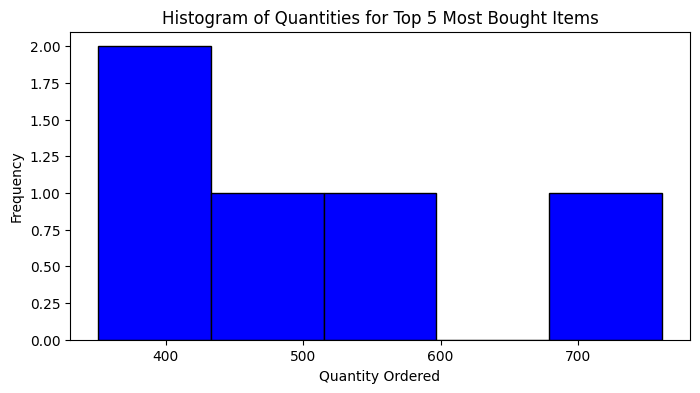

In [ ]:
# Group the data by 'item_name' and sum the 'quantity', then get the top 5 items
top_items = chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(5)

# Plot a histogram of the top 5 most bought items
plt.figure(figsize=(8, 4))
plt.hist(top_items['quantity'], bins=5, color='blue', edgecolor='black')
plt.title('Histogram of Quantities for Top 5 Most Bought Items')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()


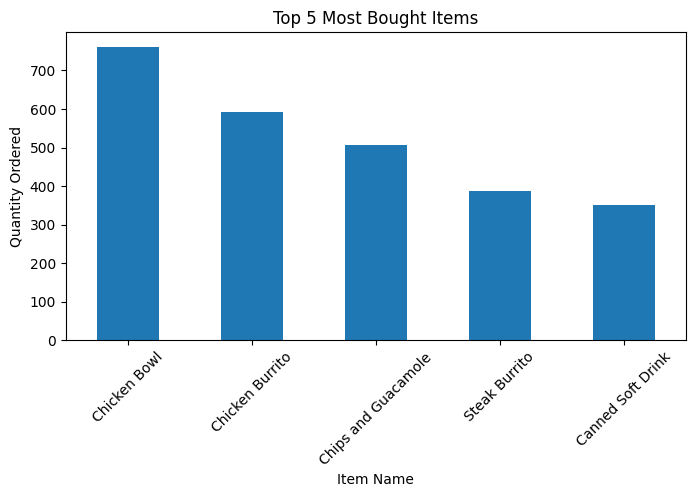

In [ ]:
top_items = chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values(by='quantity', ascending=False).head(5)
plt.figure(figsize=(8,4))
top_items['quantity'].plot(kind='bar')
plt.title('Top 5 Most Bought Items')
plt.xlabel('Item Name')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

Create a scatterplot with the number of items orderered per order price

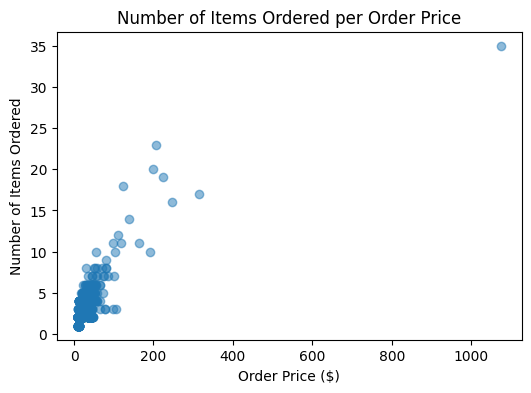

In [ ]:
chipo['total_order_price'] = chipo['quantity'] * chipo['item_price']
order_summary = chipo.groupby('order_id').agg({'quantity': 'sum', 'total_order_price': 'sum'})
plt.figure(figsize=(6,4))
plt.scatter(order_summary['total_order_price'], order_summary['quantity'], alpha=0.5)
plt.title('Number of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.show()

Create a question and a graph to answer your own question.

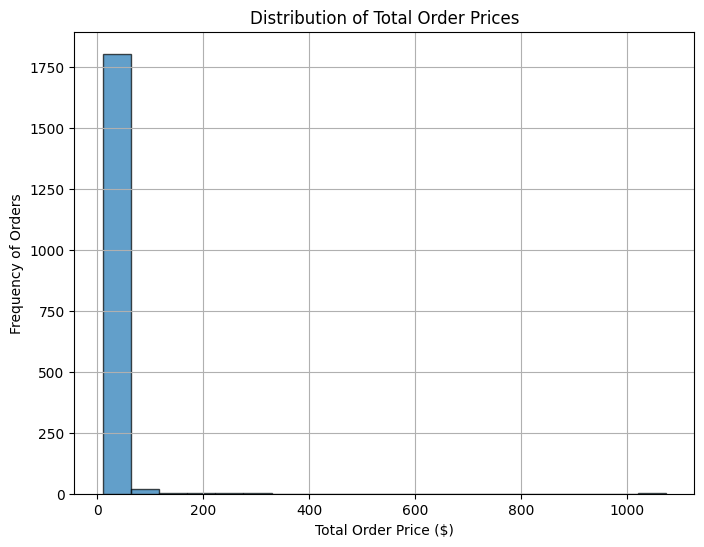

In [ ]:
# Question:
# What is the distribution of the total order price across all orders, and how does it vary across different price ranges?

order_summary_explicit = chipo.groupby('order_id').agg({
    'quantity': 'sum',
    'total_order_price': 'sum'
})

# Create histogram to show the distribution of total order prices
plt.figure(figsize=(8, 6))
plt.hist(order_summary_explicit['total_order_price'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Order Prices')
plt.xlabel('Total Order Price ($)')
plt.ylabel('Frequency of Orders')
plt.grid(True)
plt.show()

# The histogram shows the distribution of total order prices.
# It indicates that most orders fall into a lower price range, with the majority being below $100.
# Very few orders reach higher price ranges, such as over $200.
# This analysis reveals that most customers tend to place smaller orders in terms of total price.

Download the data from the following URL

https://drive.google.com/file/d/1IliBBnlvWdyqoNHpKsPWRrwynwlp69Sm/view?usp=sharing

Read and assign it to a variable called users.

In [ ]:
uploaded = files.upload()
users = pd.read_csv('users.csv', delimiter='|')
print(users)

Saving users.csv to users (2).csv
     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [ ]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

Discover what is the mean age per occupation ?

In [ ]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [ ]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_per_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


Discover the Male ratio per occupation and sort it from the most to the least

In [ ]:
male_ratio_per_occupation = users[users['gender'] == 'Male'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio_sorted = male_ratio_per_occupation.sort_values(ascending=False)
print(male_ratio_sorted)

occupation
administrator   NaN
artist          NaN
doctor          NaN
educator        NaN
engineer        NaN
entertainment   NaN
executive       NaN
healthcare      NaN
homemaker       NaN
lawyer          NaN
librarian       NaN
marketing       NaN
none            NaN
other           NaN
programmer      NaN
retired         NaN
salesman        NaN
scientist       NaN
student         NaN
technician      NaN
writer          NaN
dtype: float64


For each occupation, calculate the minimum and maximum ages

In [ ]:
age_stats_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
print(age_stats_per_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


For each combination of occupation and gender, calculate the mean age

In [ ]:
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

For each occupation present the percentage of women and men

In [ ]:
gender_counts = users.groupby(['occupation', 'gender']).size()
occupation_counts = users.groupby('occupation').size()
gender_percentage = (gender_counts / occupation_counts) * 100
gender_percentage = gender_percentage.unstack()
print(gender_percentage)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor               NaN  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


Download the data from the following URL

https://drive.google.com/file/d/1Nf5qPvISvBubc6e3vpiK7pYn4WOFXzij/view?usp=sharing

Read and assign it to a variable called crimes.

In [ ]:
uploaded = files.upload()
crimes = pd.read_csv('crimes.csv')
print(crimes)

Saving crimes.csv to crimes (1).csv
    Year  Population     Total  Violent  Property  Murder  Forcible_Rape  \
0   1960   179323175   3384200   288460   3095700    9110          17190   
1   1961   182992000   3488000   289390   3198600    8740          17220   
2   1962   185771000   3752200   301510   3450700    8530          17550   
3   1963   188483000   4109500   316970   3792500    8640          17650   
4   1964   191141000   4564600   364220   4200400    9360          21420   
5   1965   193526000   4739400   387390   4352000    9960          23410   
6   1966   195576000   5223500   430180   4793300   11040          25820   
7   1967   197457000   5903400   499930   5403500   12240          27620   
8   1968   199399000   6720200   595010   6125200   13800          31670   
9   1969   201385000   7410900   661870   6749000   14760          37170   
10  1970   203235298   8098000   738820   7359200   16000          37990   
11  1971   206212000   8588200   816500   7771700   

What is the type of the columns ?

In [ ]:
print(crimes.dtypes)

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object


Convert the type of the column Year to datetime64

In [ ]:
crimes['Year'] = pd.to_datetime(crimes['Year'], format='%Y')
print(crimes.dtypes)

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object


Set the Year column as the index of the dataframe

In [ ]:
crimes.set_index('Year', inplace=True)
print(crimes.head())

            Population    Total  Violent  Property  Murder  Forcible_Rape  \
Year                                                                        
1960-01-01   179323175  3384200   288460   3095700    9110          17190   
1961-01-01   182992000  3488000   289390   3198600    8740          17220   
1962-01-01   185771000  3752200   301510   3450700    8530          17550   
1963-01-01   188483000  4109500   316970   3792500    8640          17650   
1964-01-01   191141000  4564600   364220   4200400    9360          21420   

            Robbery  Aggravated_assault  Burglary  Larceny_Theft  \
Year                                                               
1960-01-01   107840              154320    912100        1855400   
1961-01-01   106670              156760    949600        1913000   
1962-01-01   110860              164570    994300        2089600   
1963-01-01   116470              174210   1086400        2297800   
1964-01-01   130390              203050   1213200   

Delete the Total column

In [ ]:
crimes.drop(columns='Total', inplace=True)
print(crimes.head())

            Population  Violent  Property  Murder  Forcible_Rape  Robbery  \
Year                                                                        
1960-01-01   179323175   288460   3095700    9110          17190   107840   
1961-01-01   182992000   289390   3198600    8740          17220   106670   
1962-01-01   185771000   301510   3450700    8530          17550   110860   
1963-01-01   188483000   316970   3792500    8640          17650   116470   
1964-01-01   191141000   364220   4200400    9360          21420   130390   

            Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
Year                                                                    
1960-01-01              154320    912100        1855400         328200  
1961-01-01              156760    949600        1913000         336000  
1962-01-01              164570    994300        2089600         366800  
1963-01-01              174210   1086400        2297800         408300  
1964-01-01            

Group the year by decades and sum the values

In [ ]:
crimes_decade = crimes.resample('10AS').sum()
print(crimes_decade)

            Population   Violent   Property  Murder  Forcible_Rape  Robbery  \
Year                                                                          
1960-01-01  1915053175   4134930   45160900  106180         236720  1633510   
1970-01-01  2121193298   9607930   91383800  192230         554570  4159020   
1980-01-01  2371370069  14074328  117048900  206439         865639  5383109   
1990-01-01  2612825258  17527048  119053499  211664         998827  5748930   
2000-01-01  2947969117  13968056  100944369  163068         922499  4230366   
2010-01-01  1570146307   6072017   44095950   72867         421059  1749809   

            Aggravated_assault  Burglary  Larceny_Theft  Vehicle_Theft  
Year                                                                    
1960-01-01             2158520  13321100       26547700        5292100  
1970-01-01             4702120  28486000       53157800        9739900  
1980-01-01             7619130  33073494       72040253       11935411  
19

What is the most dangerous decade to live in the US ?

In [ ]:
most_dangerous_decade = crimes_decade.sum(axis=1).idxmax()
most_dangerous_decade.year

2000

Create 3 differents Series, each of length 100, as follows:

1. The first a random number from 1 to 4
2. The second a random number from 1 to 3
3. The third a random number from 10,000 to 30,000

In [ ]:
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))
print(series1)
print(series2)
print(series3)

0     2
1     3
2     1
3     2
4     3
     ..
95    4
96    2
97    4
98    3
99    4
Length: 100, dtype: int64
0     1
1     2
2     3
3     2
4     1
     ..
95    1
96    2
97    2
98    1
99    2
Length: 100, dtype: int64
0     22824
1     29661
2     25045
3     11276
4     10000
      ...  
95    16359
96    23542
97    23607
98    11969
99    15026
Length: 100, dtype: int64


Let's create a DataFrame by joinning the Series by column

In [ ]:
df = pd.DataFrame({
    'Series1': series1,
    'Series2': series2,
    'Series3': series3
})

print(df)

    Series1  Series2  Series3
0         2        1    22824
1         3        2    29661
2         1        3    25045
3         2        2    11276
4         3        1    10000
..      ...      ...      ...
95        4        1    16359
96        2        2    23542
97        4        2    23607
98        3        1    11969
99        4        2    15026

[100 rows x 3 columns]


Change the name of the columns to bedrooms, bathrooms, price_sqr_meter

In [ ]:
df.columns = ['bedrooms', 'bathrooms', 'price_sqr_meter']
print(df)

    bedrooms  bathrooms  price_sqr_meter
0          2          1            22824
1          3          2            29661
2          1          3            25045
3          2          2            11276
4          3          1            10000
..       ...        ...              ...
95         4          1            16359
96         2          2            23542
97         4          2            23607
98         3          1            11969
99         4          2            15026

[100 rows x 3 columns]


Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [ ]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame({'bigcolumn': bigcolumn})
print(bigcolumn_df)

     bigcolumn
0            2
1            3
2            1
3            2
4            3
..         ...
295      16359
296      23542
297      23607
298      11969
299      15026

[300 rows x 1 columns]


Oops, it seems it is going only until index 99. Is it true ?

In [ ]:
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame({'bigcolumn': bigcolumn})
print(bigcolumn_df)

     bigcolumn
0            2
1            3
2            1
3            2
4            3
..         ...
295      16359
296      23542
297      23607
298      11969
299      15026

[300 rows x 1 columns]


Reindex the DataFrame so it goes from 0 to 299

In [ ]:
bigcolumn_df = bigcolumn_df.reset_index(drop=True)
bigcolumn_df.index = range(300)
print(bigcolumn_df)

     bigcolumn
0            2
1            3
2            1
3            2
4            3
..         ...
295      16359
296      23542
297      23607
298      11969
299      15026

[300 rows x 1 columns]


Download the data from the following URL

https://drive.google.com/file/d/1skwO4O-iRqns3i2EsGe6LQcxwQX53vTi/view?usp=sharing


Read and assign it to a variable called baby_names.

In [ ]:
uploaded = files.upload()
baby_names = pd.read_csv('BabyNames.csv')
print(baby_names)

Saving BabyNames.csv to BabyNames (1).csv
         Unnamed: 0       Id     Name  Year Gender State  Count
0             11349    11350     Emma  2004      F    AK     62
1             11350    11351  Madison  2004      F    AK     48
2             11351    11352   Hannah  2004      F    AK     46
3             11352    11353    Grace  2004      F    AK     44
4             11353    11354    Emily  2004      F    AK     41
...             ...      ...      ...   ...    ...   ...    ...
1016390     5647421  5647422     Seth  2014      M    WY      5
1016391     5647422  5647423  Spencer  2014      M    WY      5
1016392     5647423  5647424     Tyce  2014      M    WY      5
1016393     5647424  5647425   Victor  2014      M    WY      5
1016394     5647425  5647426   Waylon  2014      M    WY      5

[1016395 rows x 7 columns]


See the first 10 entries

In [ ]:
print(baby_names.head(10))

   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28


Delete the column 'Unnamed: 0' and 'Id'

In [ ]:
baby_names = baby_names.drop(['Unnamed: 0', 'Id'], axis=1)
print(baby_names.head(10))

       Name  Year Gender State  Count
0      Emma  2004      F    AK     62
1   Madison  2004      F    AK     48
2    Hannah  2004      F    AK     46
3     Grace  2004      F    AK     44
4     Emily  2004      F    AK     41
5   Abigail  2004      F    AK     37
6    Olivia  2004      F    AK     33
7  Isabella  2004      F    AK     30
8    Alyssa  2004      F    AK     29
9    Sophia  2004      F    AK     28


Is there more male or female names in the dataset ?

Answer:
1. F    558846
2. M    457549

In [ ]:
gender_counts = baby_names['Gender'].value_counts()
for i, (gender, count) in enumerate(gender_counts.items(), 1):
    print(f"{i}. {gender} {count}")

1. F 558846
2. M 457549


Group the dataset by name and assign to names

In [ ]:
names = baby_names.groupby('Name')
print(names.head())

            Name  Year Gender State  Count
0           Emma  2004      F    AK     62
1        Madison  2004      F    AK     48
2         Hannah  2004      F    AK     46
3          Grace  2004      F    AK     44
4          Emily  2004      F    AK     41
...          ...   ...    ...   ...    ...
1004923  Gryffin  2014      M    WI      5
1004950     Kroy  2014      M    WI      5
1004973     Owyn  2014      M    WI      5
1005707   Haylea  2005      F    WV      5
1012216  Coalton  2012      M    WV      7

[65502 rows x 5 columns]


How many different names exist in the dataset ?

Answer: 17632

In [ ]:
num_unique_names = baby_names['Name'].nunique()
num_unique_names

17632

What is the name with most occurrences ?

Answer: 'Jacob'

In [ ]:
name_counts = baby_names.groupby('Name')['Count'].sum()
most_common_name = name_counts.idxmax()
most_common_name

'Jacob'

How many different names have the least occurrences ?

Answer: 2578

In [ ]:
min_count = name_counts.min()
names_with_min_count = name_counts[name_counts == min_count].count()
names_with_min_count

2578

What is the median name occurrence ?

In [ ]:
median_occurrence = name_counts.median()
median_occurrence

49.0

What is the standard deviation of names ?

Answer: 11006.069467891111

In [ ]:
std_dev_occurrence = name_counts.std()
std_dev_occurrence

11006.06946789057

Get a summary with the mean, min, max, std and quartiles.

In [ ]:
summary_stats = name_counts.describe()
print(summary_stats)

count     17632.000000
mean       2008.932169
std       11006.069468
min           5.000000
25%          11.000000
50%          49.000000
75%         337.000000
max      242874.000000
Name: Count, dtype: float64
